In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datasets.syntethic_dataset import *

from algorithms.other_algos import *
from metrics.distortion import *

Loading synthetic dataset with following parameters: {'seed': 0, 'n_samples': 500, 'dimension': 2, 'n_clusters': 3, 'proportion': [0.1, 0.2, 0.7], 'means': [[0, 1], [1, 0], [1, 1]], 'stds': [[0.4, 0.1], [0.1, 0.3], [0.3, 0.3]], 'pre_visualization': True}


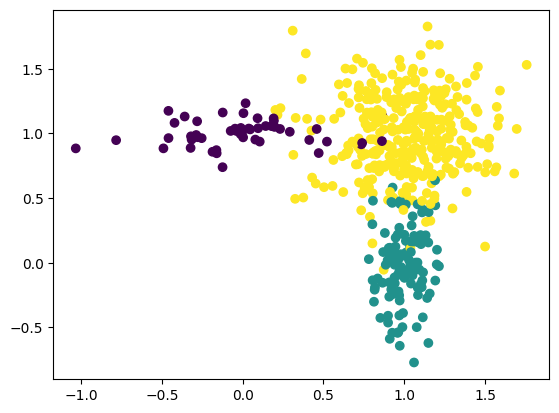

Data shape : (500, 2)
Target shape : (500,)
Synthetic dataset loaded.


In [3]:
config = {
    "seed" : 0,
    "n_samples" : 500,
    "dimension" : 2,
    "n_clusters" : 3,
    "proportion" : [0.1, 0.2, 0.7],  # random, uniform, or list of proportions
    "means" : [[0,1], [1,0], [1,1]],          # 'random' (N(0,I_d)), or list of means
    "stds" : [[0.4,0.1], [0.1,0.3], [0.3,0.3]],  # 'random' (U(min_std, max_std)), or list of stds
    "pre_visualization" : True,           # if True, plot the data before generating the dataset in the 2D case 
}

ds = SyntheticDataset(config)

In [10]:
config_algo = {
    "k": 3,
}

result, centroid = KKZ_Algorithm(config_algo).fit(ds.x_data)

In [11]:
DistortionMetric({}).compute_metrics(ds, result)

Computing distortion...


{'distortion': 64.8595044987628, 'best_distortion': 64.8595044987628}

In [12]:

print("Centroid : ", centroid)

Centroid :  [401, 305, 452]


In [13]:
# convert result to array of labels
labels = np.zeros(ds.x_data.shape[0])
for k, v in result.items():
    labels[v] = k

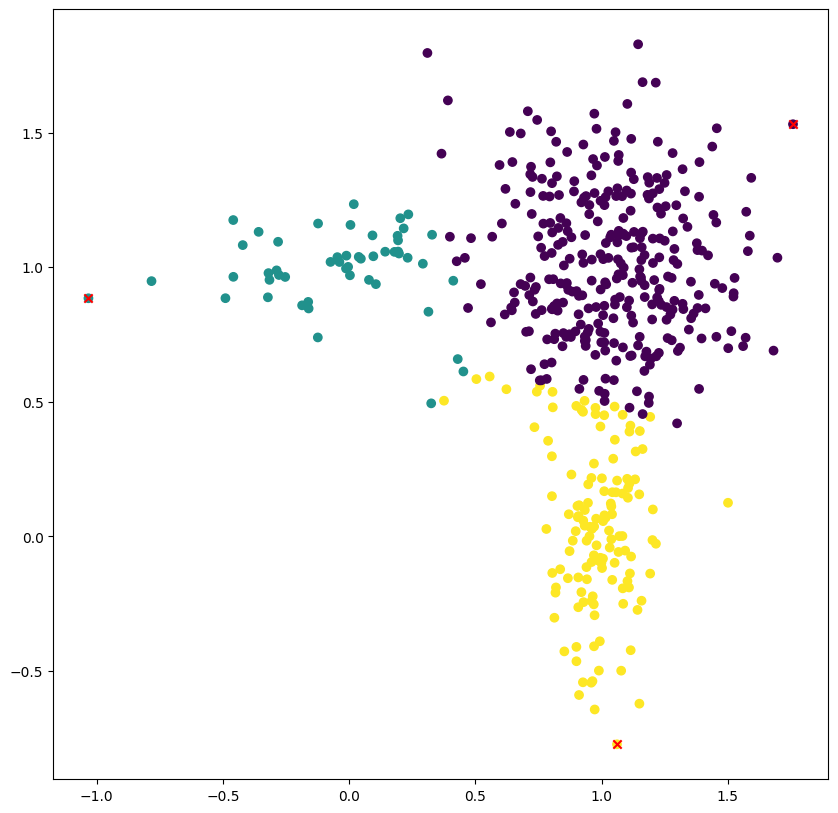

In [15]:
# display result
plt.figure(figsize=(10,10))
plt.scatter(ds.x_data[:,0], ds.x_data[:,1], c=labels)
plt.scatter(ds.x_data[centroid,0], ds.x_data[centroid,1], c='red', marker='x')
plt.show()

In [13]:
# performance time test for kmeans++ with synthetic dataset
config_data = {
    "seed" : 0,
    "n_samples" : 100_000,
    "dimension" : 50,
    "n_clusters" : 10,
    "proportion" : "uniform",
    "means" : "random",          # 'random' (N(0,I_d)), or list of means
    "stds" : None,  # 'random' (U(min_std, max_std)), or list of stds
    "min_std": 0.1,
    "max_std": 2,
    "pre_visualization" : False,           # if True, plot the data before generating the dataset in the 2D case 
}

ds = SyntheticDataset(config_data)

Loading synthetic dataset with following parameters: {'seed': 0, 'n_samples': 100000, 'dimension': 50, 'n_clusters': 10, 'proportion': 'uniform', 'means': 'random', 'stds': None, 'min_std': 0.1, 'max_std': 2, 'pre_visualization': False}
Data shape : (100000, 50)
Target shape : (100000,)
Synthetic dataset loaded.


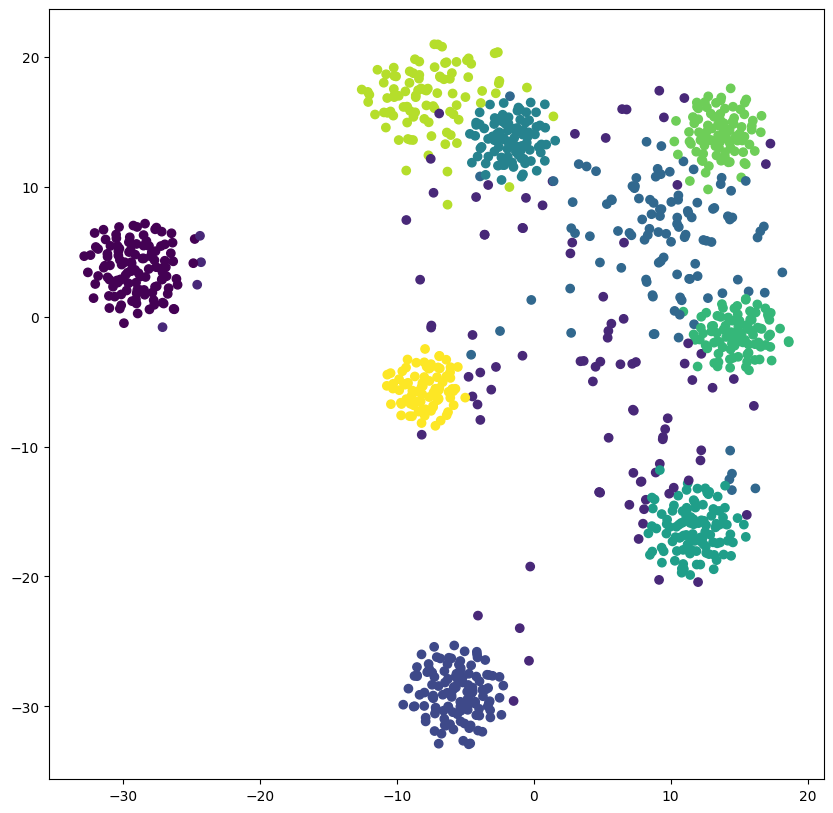

In [12]:
# # tnse visualization
# from sklearn.manifold import TSNE
# X_embedded = TSNE(n_components=2).fit_transform(ds.x_data)
# plt.figure(figsize=(10,10))
# plt.scatter(X_embedded[:,0], X_embedded[:,1], c=ds.y_data)
# plt.show()

In [32]:
timepoints = []
results = []
config_algo = {
    "k": 10,
}
algo = KMeansPlusPlusAlgorithm(config_algo)

from time import time
from tqdm.notebook import tqdm

timepoints.append(time())
for _ in tqdm(range(750)):
    result = algo.fit(ds.x_data)
    results.append(result)
    timepoints.append(time())


  0%|          | 0/750 [00:00<?, ?it/s]

In [33]:
timepoints = np.array(timepoints)
metrics = np.array([DistortionMetric({}).compute_metrics(ds, result)["distortion"] for result in results])
time_since_start = timepoints[1:] - timepoints[0]
best_result_so_far = np.minimum.accumulate(metrics)

Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distortion...
Computing distor

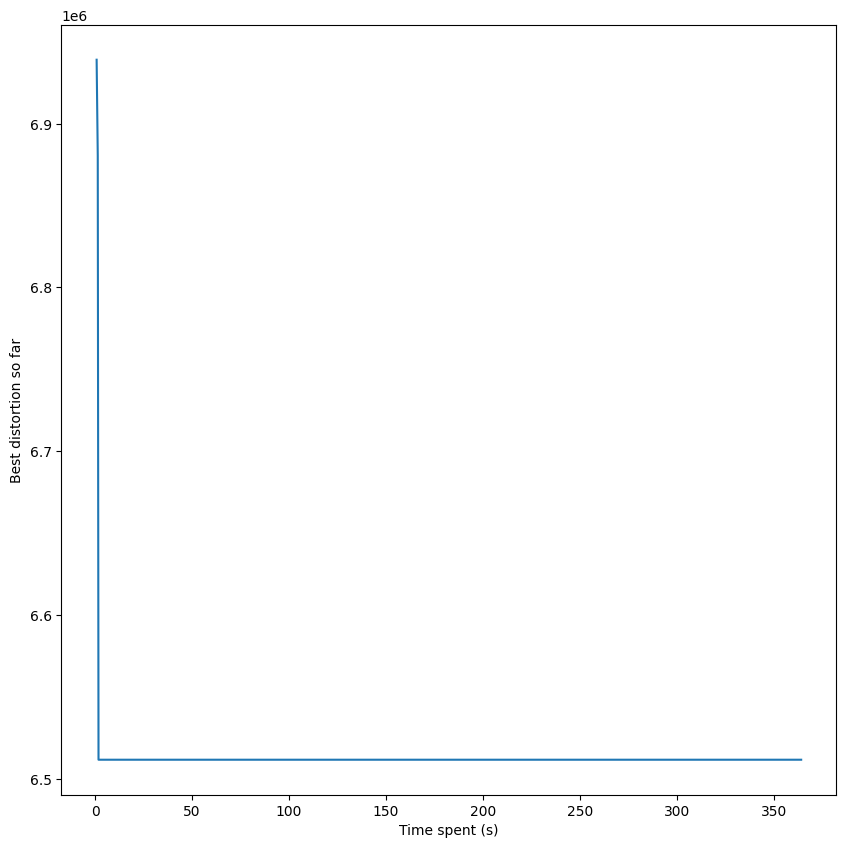

In [34]:
# plot
plt.figure(figsize=(10,10))
plt.plot(time_since_start, best_result_so_far)
plt.xlabel("Time spent (s)")
plt.ylabel("Best distortion so far")
plt.show()


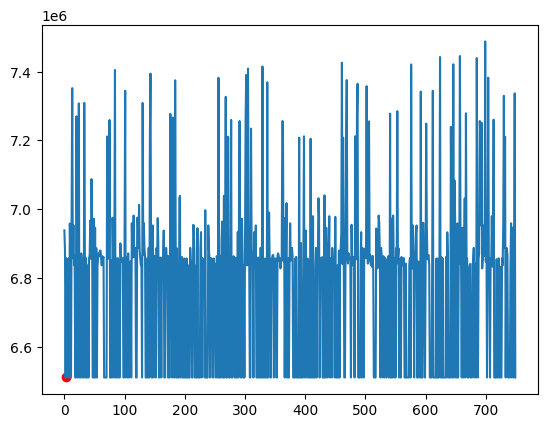

In [36]:
plt.plot(metrics)
plt.scatter(np.argmin(metrics), np.min(metrics), c="r")

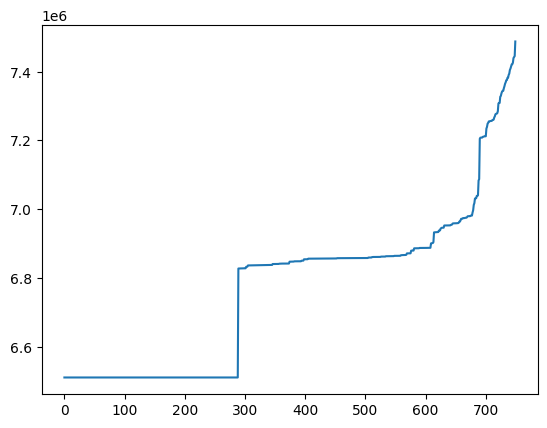

In [37]:
ordering = np.argsort(metrics)
plt.plot(metrics[ordering])

In [38]:
# count nmber of times each metric is the best
np.sum(metrics[ordering] == np.min(metrics))

289

In [3]:
from datasets.cv_datasets import *


dsmnist = MNISTDataset({})

Loading MNIST dataset...
Data shape : (70000, 784)
Target shape : (70000,)
MNIST dataset loaded.


In [5]:
algo = KMeansPlusPlusAlgorithm({"k": 10})

result = algo.fit(dsmnist.x_data)

distortion = DistortionMetric({}).compute_metrics(dsmnist, result)["distortion"]

Computing distortion...


In [6]:
# format in scientific notation
print(f"{distortion:.2e}")

1.78e+11


In [4]:
def distortion(result, x_data):
    # compute centroids
    centroids = np.array([np.mean(x_data[result[k]], axis=0) for k in range(len(result))])
    # compute distortiona
    distortion = 0
    for k in range(len(result)):
        distortion += np.sum(np.linalg.norm(x_data[result[k]] - centroids[k], axis=1, ord=2)**2)
    return distortion

In [31]:
print(f"{distortion(result, dsmnist.x_data):.2e}")

1.78e+11


In [18]:
timepoints = []
results = []
config_algo = {
    "k": 10,
}

algo = KMeansPlusPlusAlgorithm(config_algo)

from time import time
from tqdm.notebook import tqdm

timepoints.append(time())
for _ in tqdm(range(50)):
    result = algo.fit(dsmnist.x_data)
    results.append(result)
    timepoints.append(time())


  0%|          | 0/50 [00:00<?, ?it/s]

In [22]:
distortions = np.array([distortion(result, dsmnist.x_data) for result in results])
timepoints = np.array(timepoints)
time_since_start = timepoints[1:] - timepoints[0]
best_result_so_far = np.minimum.accumulate(distortions)

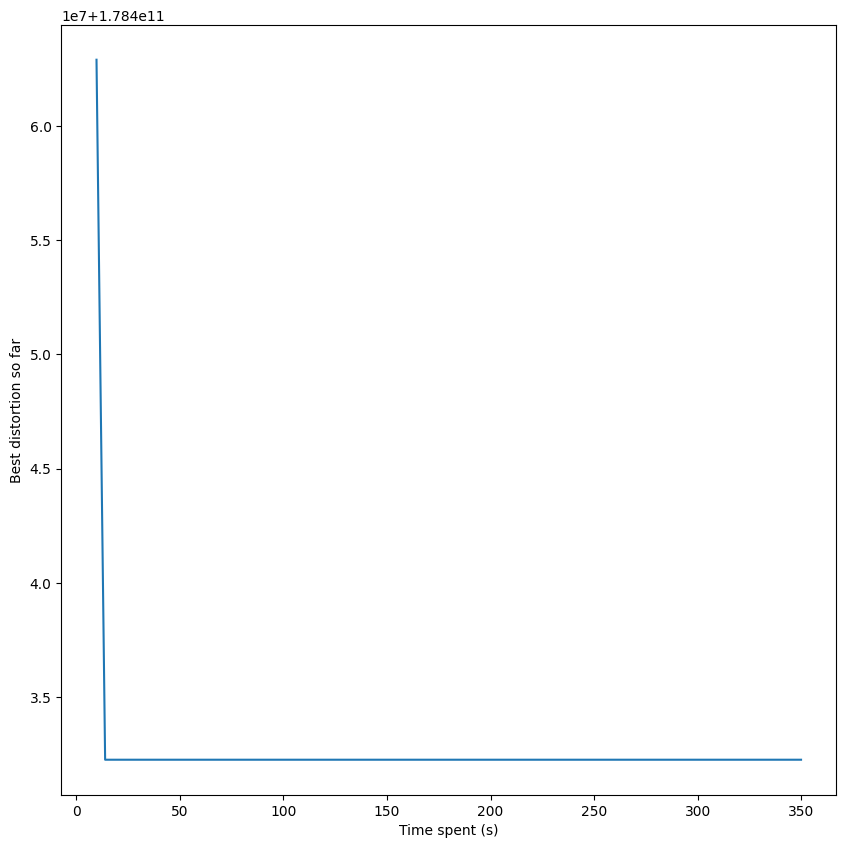

In [23]:
# plot
plt.figure(figsize=(10,10))
plt.plot(time_since_start, best_result_so_far)
plt.xlabel("Time spent (s)")
plt.ylabel("Best distortion so far")
plt.show()


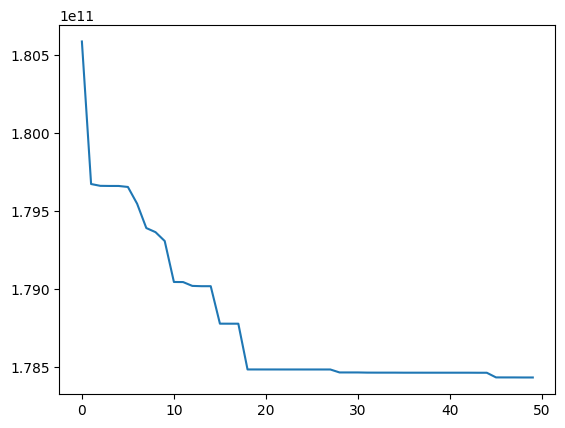

In [21]:
ordering = np.argsort(distortions)[::-1]
plt.plot(distortions[ordering])

In [24]:
distortions

array([1.78462915e+11, 1.78432238e+11, 1.78432748e+11, 1.78463253e+11,
       1.78483491e+11, 1.78432555e+11, 1.79672519e+11, 1.79044492e+11,
       1.78483579e+11, 1.79017481e+11, 1.78483660e+11, 1.78463253e+11,
       1.78462864e+11, 1.78483476e+11, 1.78483504e+11, 1.78464465e+11,
       1.78432573e+11, 1.78462858e+11, 1.78483597e+11, 1.79653653e+11,
       1.78464486e+11, 1.79017481e+11, 1.78462914e+11, 1.79363906e+11,
       1.78462856e+11, 1.78464477e+11, 1.78483446e+11, 1.79660860e+11,
       1.78483524e+11, 1.79660004e+11, 1.78483522e+11, 1.78432239e+11,
       1.79546332e+11, 1.78462855e+11, 1.78462890e+11, 1.78463253e+11,
       1.78462555e+11, 1.78483684e+11, 1.80586376e+11, 1.78777232e+11,
       1.78462567e+11, 1.78777035e+11, 1.79019349e+11, 1.79660099e+11,
       1.78777066e+11, 1.79307054e+11, 1.79043914e+11, 1.78463404e+11,
       1.78462895e+11, 1.79390322e+11])

In [25]:
timepoints = []
results = []
config_algo = {
    "k": 10,
}

algo = PCA_GuidedSearchAlgorithm(config_algo)

from time import time
from tqdm.notebook import tqdm

timepoints.append(time())
for _ in tqdm(range(50)):
    result = algo.fit(dsmnist.x_data)
    results.append(result)
    timepoints.append(time())

  0%|          | 0/50 [00:00<?, ?it/s]

In [26]:
distortions = np.array([distortion(result, dsmnist.x_data) for result in results])
timepoints = np.array(timepoints)
time_since_start = timepoints[1:] - timepoints[0]
best_result_so_far = np.minimum.accumulate(distortions)

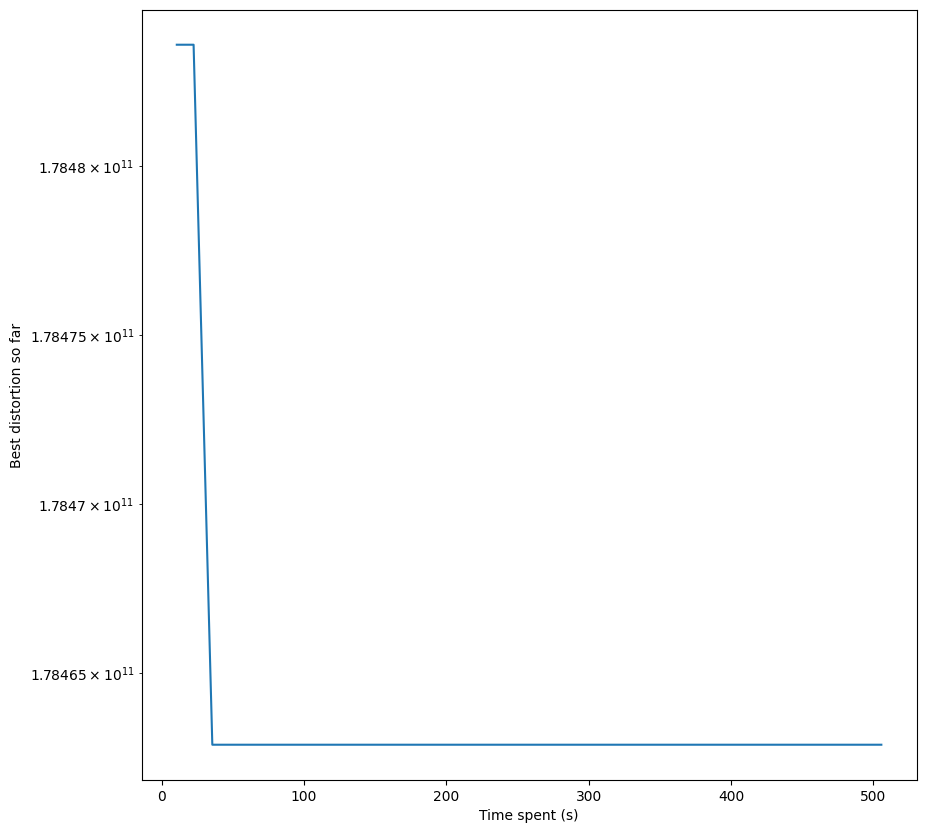

In [32]:
# plot
plt.figure(figsize=(10,10))
plt.plot(time_since_start, best_result_so_far)
plt.yscale("log")
plt.xlabel("Time spent (s)")
plt.ylabel("Best distortion so far")
plt.show()

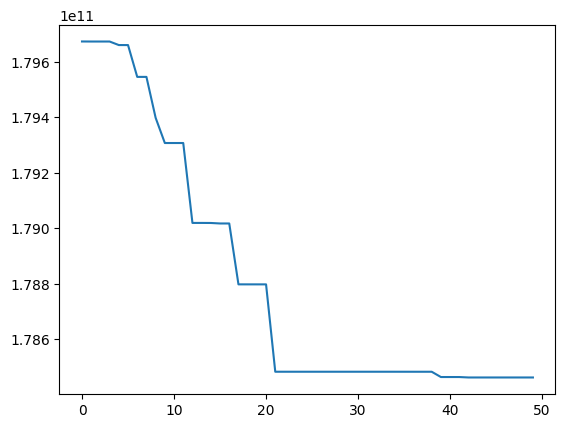

In [28]:
ordering = np.argsort(distortions)[::-1]
plt.plot(distortions[ordering])

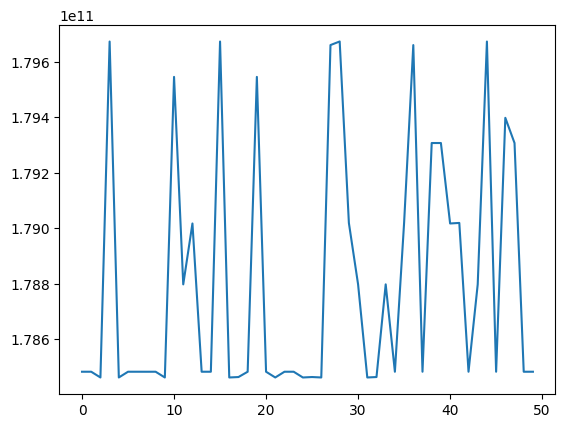

In [29]:
plt.plot(distortions)   

In [37]:
# get bytes size of an object
import sys
print("Size of object in bytes:", sys.getsizeof(distortions)/len(distortions))

Size of object in bytes: 10.24
